# Correlation Analysis on Amazon Speaker Reviews

## Step 1: Import Required Libraries and Load Dataset

In [ ]:
# === Required Imports ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files

# === Upload and Load CSV ===
uploaded = files.upload()
df = pd.read_csv('Cleaned_Speaker_Reviews_EDA.csv')

# === Clean Column Names ===
df.columns = [str(col).strip().lower().replace(' ', '_') for col in df.columns]

# === Preview Data ===
df.head()


Saving Cleaned_Speaker_Reviews_EDA.csv to Cleaned_Speaker_Reviews_EDA (1).csv


,unnamed:_0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,review_length,normalized_rating
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5.0,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black,410,1.00
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4.0,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red,657,0.75
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5.0,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red,579,1.00
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1.0,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black,578,0.00
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3.0,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black,276,0.50


## Step 2: Calculate the Correlation Matrix

In [ ]:

correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                   unnamed:_0    rating  is_verified  helpful_count  \
unnamed:_0           1.000000  0.041496    -0.031880      -0.024750   
rating               0.041496  1.000000     0.070521       0.005550   
is_verified         -0.031880  0.070521     1.000000       0.020697   
helpful_count       -0.024750  0.005550     0.020697       1.000000   
review_length        0.056376 -0.113680    -0.078511       0.349617   
normalized_rating    0.041496  1.000000     0.070521       0.005550   

                   review_length  normalized_rating  
unnamed:_0              0.056376           0.041496  
rating                 -0.113680           1.000000  
is_verified            -0.078511           0.070521  
helpful_count           0.349617           0.005550  
review_length           1.000000          -0.113680  
normalized_rating      -0.113680           1.000000  


## Step 3: Filter Significant Correlations

In [ ]:
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(significant_correlations)

                   unnamed:_0  rating  is_verified  helpful_count  \
unnamed:_0                1.0     NaN          NaN            NaN   
rating                    NaN     1.0          NaN            NaN   
is_verified               NaN     NaN          1.0            NaN   
helpful_count             NaN     NaN          NaN            1.0   
review_length             NaN     NaN          NaN            NaN   
normalized_rating         NaN     1.0          NaN            NaN   

                   review_length  normalized_rating  
unnamed:_0                   NaN                NaN  
rating                       NaN                1.0  
is_verified                  NaN                NaN  
helpful_count                NaN                NaN  
review_length                1.0                NaN  
normalized_rating            NaN                1.0  


## Step 4: Visualize the Correlation Matrix as a Heatmap

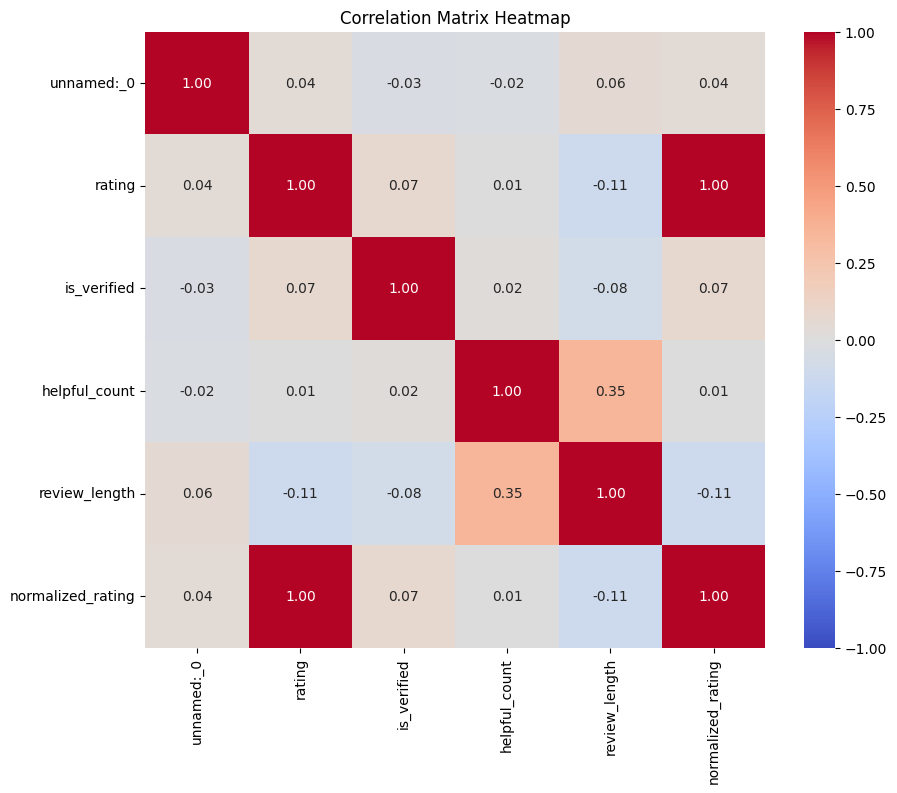

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Step 5: Scatter Plot of Helpful Count vs. Rating

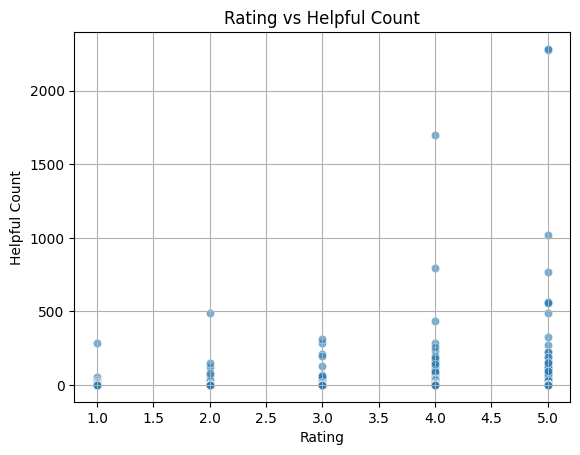

In [ ]:
sns.scatterplot(x='rating', y='helpful_count', data=df, alpha=0.6)
plt.title('Rating vs Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.grid(True)
plt.show()

## Step 6: Save the Correlation Matrix

In [ ]:
# Create export directory
corr_export_dir = 'correlation_analysis_exports'
os.makedirs(corr_export_dir, exist_ok=True)

# Correlation Matrix (from numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()
correlation_matrix = numeric_df.corr()

# === Save Correlation Heatmap ===
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig(f'{corr_export_dir}/correlation_heatmap.png')
plt.close()

# === Save Scatter Plot: Helpful Count vs. Rating ===
plt.figure(figsize=(10, 6))
sns.scatterplot(x='helpful_count', y='rating', data=df, alpha=0.6)
plt.title('Helpful Count vs. Rating')
plt.xlabel('Helpful Count')
plt.ylabel('Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig(f'{corr_export_dir}/scatter_helpful_vs_rating.png')
plt.close()

# === Zip and Download ===
zip_filename = 'correlation_analysis_export.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, _, files_in_dir in os.walk(corr_export_dir):
        for file in files_in_dir:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, corr_export_dir)
            zipf.write(file_path, arcname=arcname)

files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>